In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [52]:
def is_pos_sdef(x):
    """Checks matrix positive semi-definite"""
    return np.all(np.linalg.eigvals(x) >= 0)

def recur(K, h, g, e, x2):
    """The expectation value matrix formed via recursion relation. Here we set up the recursion relation and append the
    results to a matrix. The output is this matrix where M_{i, j} = <x^{i+j}>. K+1 is the size of the matrix,
     g is the coupling for the anharmonic piece, e is the energy (E in the paper) and x2 is the second exp. val (<x^2>
    in the paper)."""
    x = np.zeros((1, 2 * (K + 1)))[0]
    x[0] = 1
    x[1] = 0
    x[2] = x2
    x[3] = 0
    x[4] = (1 / (3 * g)) * (e - 2 * h * x2)
    for t in range(2, (2 * (K + 1)) - 3):
        if t % 2 == 0:
            x[t + 3] = 0
        else:
            x[t + 3] = (1 / (2 * g * (1 + (t / 2)))) * (
                        t * e * x[t - 1] + (1 / 4) * t * (t - 1) * (t - 2) * x[t - 3] - t * h * x[t + 1] - h * x[t + 1])
    mat = np.zeros(((K + 1), (K + 1)))
    for j in range(0, (K + 1)):
        for i in range(0, (K + 1)):
            mat[i, j] = x[i + j]

    arr_all_odd = np.delete(mat, list(range(1, mat.shape[0], 2)), axis=1)
    arr_odd_odd = np.delete(arr_all_odd, list(range(1, mat.shape[1], 2)), axis=0)
    
    return [arr_odd_odd, mat]

In [54]:
def data_col(n_data, dim, h, g, eval_range, x2_val_range, mat_type):
    """data_col(dim) collects a list of pairs. The pairs are (energy, <x^2>) = (e_val, x2_val) values that are shown,
    when used in the recur() function to produce a positive
     semi-definite resulting matrix of expectation values. 
     n_data = number of trials
     dim = dimension of matrix
     h, g = x^2, x^4 coupling parameters 
     eval_range, x2_val_range = scan range of energy, x2 
     mat_type= 0 for odd moments removed, 1 for odd moments remaining"""
    lst_pass = []
    lst_fail = []
    for q in range(n_data):
        e_val = random.uniform(eval_range[0], eval_range[1])
        x2_val = random.uniform(x2_val_range[0], x2_val_range[1])
        try:
            if is_pos_sdef(np.linalg.cholesky(recur(dim, np.float64(h), np.float64(g), np.float64(e_val), np.float64(x2_val))[mat_type])):
                lst_pass.append((e_val, x2_val))
            else:
                lst_fail.append((e_val, x2_val))
        except np.linalg.LinAlgError:
            pass
    return lst_pass

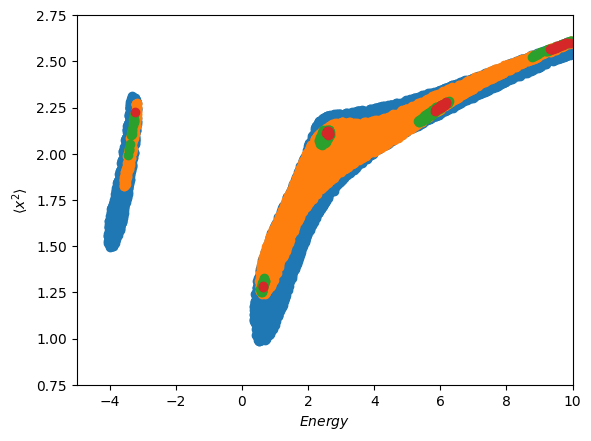

In [64]:
h0,g0=-5,1
eval_range=[-5,10]
x2_val_range=[0.75,2.75]
mat_type=0
n_data = 100000

z_passList = [list(zip(*data_col(n_data,i,h0,g0,eval_range,x2_val_range,mat_type))) for i in range(12,21,2)]

for i in range(0, len(z_passList)-1):
    plt.scatter(z_passList[i][0], z_passList[i][1])

plt.xlabel("$Energy$")
plt.ylabel(r"$\langle x^2 \rangle$")
plt.xlim([-5, 10])
plt.ylim([0.75, 2.75])
plt.show()

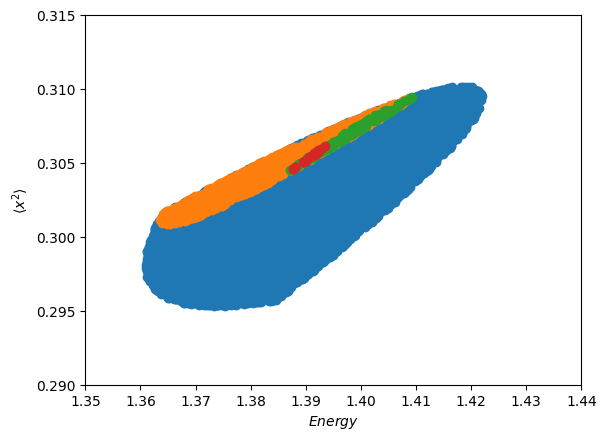

In [59]:
h0,g0=1,1
eval_range=[1.35,1.44]
x2_val_range=[0.29,0.315]
mat_type=1
n_data = 50000

z_passList = [list(zip(*data_col(n_data,i,h0,g0,eval_range,x2_val_range,mat_type))) for i in range(7,12)]

for i in range(0, len(z_passList)-1):
    plt.scatter(z_passList[i][0], z_passList[i][1])

plt.figure(1)
plt.xlabel("$Energy$")
plt.ylabel(r"$\langle x^2 \rangle$")
plt.xlim(eval_range)
plt.ylim(x2_val_range)
plt.show()